## Fourier Transforms

**Nick Kern**
<br>
**Astro 9: Python Programming in Astronomy**
<br>
**UC Berkeley**

Reading: Chp 7 of Newman

The [Fourier Transform](https://en.wikipedia.org/wiki/Fourier_transform) is a mathematical operation that is one of the most widely used techniques in physics and engineering. A Fourier Transform allows us to take a time-dependent signal and transform it into frequency space. You may have seen the Fourier Transform defined as an integral over a continuous field:

\begin{align}
F(\nu) &= \int_{-\infty}^{\infty}f(t)e^{-2\pi i\nu t}dt\\
\\
f(t) &= \int_{-\infty}^{\infty}F(\nu)e^{2\pi i\nu t}d\nu
\end{align}

In this lecture, we will look at how we can approximate the above integrals on computers. As you may have guessed, this means approximating continuous integrals as discrete sums.

### The Fourier Series

At the core of a Fourier Transform (FT) is the concept of the [Fourier Series](https://en.wikipedia.org/wiki/Fourier_series), which says that we can represent any periodic signal as the infinite linear sum of sinusoids with varying amplitudes and wavelengths. Let's assume we have some periodic signal on the $x$-axis, and we are interested in looking at its behavior from $-L/2 < x < L/2$.

<img src='imgs/sawtooth.png' width=500px/>
<center>A sawtooth wave, which we will look to model from $-L/2 < x < L/2$.

Because we have both the cosine and sine functions, we can write two distinct Fourier Series for different kinds of periodic signals using either cosines or sines. Because cosine is symmetric about the y-axis, we call this an *even* function, and because sine is symmetric about the origin, we call this an *odd* function. 

<img src='imgs/sinusoids.png' width=400px/>

We can therefore construct an even and odd Fourier series, which looks something like

\begin{align}
f(x) &= \sum_{k=0}^{n=\infty}\alpha_k\cos\left(\frac{2\pi kx}{L}\right)\\
\\
f(x) &= \sum_{k=1}^{n=\infty}\beta_k\sin\left(\frac{2\pi kx}{L}\right)
\end{align}

For a periodic signal that is odd we would use the sine series, and for a signal that is even we would use the cosine series. The only trick is to figure out the values for the scalars $\alpha_k$ and $\beta_k$.

### Breakout 1: Sine Series for Sawtooth Wave

Try to recreate the sawtooth function with a sine series. Assume a sawtooth function can be represented analytically as $f(x) = \frac{x}{L}$ for $-\tfrac{L}{2} < x < \tfrac{L}{2}$, where you should take $L = 1$. Further, use the fact that the coefficients $\beta_k$ for a sawtooth wave are given as

\begin{align}
\beta_k = -\frac{2A}{k\pi}(-1)^k,
\end{align}

where $A$ is the amplitude of the sawtooth function, which for us is $A=0.5$.

1.
Write a function that will take-in a value for $x$ and will output $f(x)$ given the number of terms to use in the series, $n$.

2.
Make a plot of the sawtooth and then overplot the sine series with $n=[1, 3, 5, 10, 100]$.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [198]:
def sine_series(x, n=100):
    L = 1.0
    k_array = np.arange(1, n+1)
    beta_array = -1/(k_array*np.pi) * (-1)**(k_array)
    series = 0
    sinusoids = np.sin(2*np.pi*k_array*x/L)
    series = sum(beta_array * sinusoids)
    return series

In general, though, some signal we want to represent is neither odd nor even. For such an arbitrary function, we can use a combination of both sines and cosines:

\begin{align}
f(x) = \sum_{k=0}^{\infty}\alpha_k\cos\left(\frac{2\pi kx}{L}\right) + \sum_{k=1}^{\infty}\beta_k\sin\left(\frac{2\pi kx}{L}\right).
\end{align}

Having to write out the sine and cosine terms is a little cumbersome. We can simplify it by turning the cosine and sine terms into a single complex term using [**Euler's Formula**](https://en.wikipedia.org/wiki/Euler%27s_formula), which says $e^{ix} = \cos(x) + i\sin(x)$. Utilizing the identities of $\cos\theta = \tfrac{1}{2}\left(e^{-i\theta}+e^{i\theta}\right)$ and $\sin\theta = \tfrac{1}{2}i\left(e^{-i\theta}-e^{i\theta}\right)$, we find that the previous equation can also be represented as

\begin{align}
f(x) &= \sum_{-\infty}^{\infty}\gamma_k\exp\left(i\frac{2\pi kx}{L}\right)\\
\text{where}&\\
\gamma_k &=
\begin{cases}
\tfrac{1}{2}(\alpha_{-k}+i\beta_{-k}) & \text{if}\ k\lt0\\
\alpha_0 & \text{if}\ k = 0\\
\tfrac{1}{2}(\alpha_k - i\beta_k) & \text{if}\ k\gt0
\end{cases}
\end{align}

Note that we only have a single term in our sum, but the sum now goes from $-\infty \rightarrow \infty$.

The question now becomes how we solve for the $\gamma_k$ terms. We can do this by **integrating our sinusoids against the function**, like so:

\begin{align}
\gamma_k = \frac{1}{L}\int f(x)\exp\left(-i\frac{2\pi kx}{L}\right)dx
\end{align}

It is not unusual that $f(x)$ is such a complicated function that we cannot perform the above integral by hand. The question then becomes, how can we do this numerically? To do this, we need to use **numerical integration**. This is also known as the **discrete Fourier transform**.

### The Discrete Fourier Transform (DFT)

Let's look at this using the trapezoidal rule. Recall that the trapezoidal rule says that an integral can be approximated by breaking the function into $N$ slices and summing the y-values like

\begin{align}
\int g(x) dx &\simeq h\left[\tfrac{1}{2}g(a) + \tfrac{1}{2}g(b) + \sum_{n=1}^{N-1}g(x_n)\right]
\end{align}

In our case, $h = \tfrac{L}{N}$ and $g(x_n) = f(x_n)\cdot\exp\left[-i\frac{2\pi kx_n}{L}\right]$. However, recall that we defined $f(x)$ to be periodic! Therefore $g(a) = g(b)$, and our discrete approximation for $y_k$ becomes

\begin{align}
\gamma_k = \frac{1}{N}\sum_{n=0}^{N-1}f(x_n)\exp\left(-i\frac{2\pi kx_n}{L}\right).
\end{align}

In the case that our function $f(x)$ is not continuous but is given to us already discretized with $y$values $y_n$ (which is very often the case!), we can rewrite this as

\begin{align}
c_k = \sum_{n=0}^{N-1}y_n\exp\left(-i\frac{2\pi kn}{N}\right),
\end{align}

where we are now labeling the Fourier coefficients as $c_k$ because this is a commonly used equation called the *discrete Fourier transform*. Notice that by convention, $c_k$ doesn't have the $\tfrac{1}{N}$ in front.

Just like the continuous counterpart, we can convert from $c_k$ back to $y_n$ using the discrete inverse Fourier transform, written as

\begin{align}
y_n = \frac{1}{N}\sum_{k=0}^{N-1}c_k\exp\left(i\frac{2\pi kn}{N}\right).
\end{align}

Note that our DFTs don't need to know the position of the samples along $x_n$! Besides this, there is one major difference staring us in the face when we compare the discrete Fourier transform and the Fourier Series: the sum in the former does not extend to infinity, while it does so in the latter.

One caveat is that our discrete Fourier transform, when using all the terms, is in fact exact! Even though we have a finite number of terms, we also have a finite number of sampling points. This means we are free to transform back and forth from the space domain ($y_n$) to the Fourier domain ($c_k$) and we won't lose any information. We call these kinds of transformations **lossless transformations**.

Another caveat is while we can reproduce our $y_n$ points exactly, we still have no-idea what is going on in between those points. For example, two functions that are different but happen to give the same $y_n$ will have the exact same DFT.


**Example: Write a DFT Function**

Let's write a funtion that will perform the DFT and inverse DFT (IDFT) given an array of $y$ values and $c$ values. I've already written a DFT script for you, its your job to write the IDFT.

In [12]:
def dft(y):
    # get number of points
    N = len(y)
    
    # initialize empty array for coefficients
    c = np.zeros(N, dtype=np.complex)
    
    # loop over coefficients, then loop over sum
    for k in range(N):
        for n in range(N):
            # Perform DFT sum
            c[k] += y[n] * np.exp(-1j*2*np.pi*k*n/N)
            
    return c

def idft(c):
    # get number of points
    N = len(c)
    
    # initialize empty array for coefficients
    y = np.zeros(N, dtype=np.complex)
    
    # loop over coefficients, then loop over sum
    for n in range(N):
        for k in range(N):
            # Perform DFT sum
            y[n] += c[k] * np.exp(1j*2*np.pi*k*n/N) / N
            
    return y

1.
Use your functions to take the DFT of

* a sinc wave: $f(x) = \rm{sinc}(x)$
* a square wave: $f(x) = 0\rightarrow1\rightarrow0$
* a sawtooth wave: $f(x) = x$
* an exponential wave: $f(x) = 1/x$
* a sine wave: $f(x) = \sin(n\pi x)$

from $-L/2 < x < L/2$, where you are free to choose $L$ as you want. Make sure the `idft` gives back the same function you had before!

2.
Plot the Fourier coefficients. What shapes do you find in the Fourier domain as compared to the input domain?

In [3]:
# Make an x-array
x_arr = np.linspace(-5, 5, 100)

In [39]:
# Sample various functions for y-values
y_sinc = np.sinc(x_arr*3)
y_sqr = np.ones(len(x_arr))
y_sqr[:90] = 0
y_saw = 0.2*x_arr
y_exp = .3/x_arr
y_exp[50] = 0 
y_sin = np.sin(0.5*np.pi*x_arr)

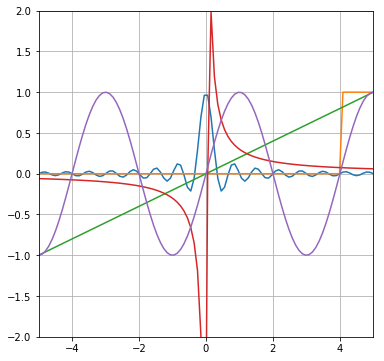

In [40]:
# Plot
fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)
ax.grid(True)
ax.set_xlim(-5, 5)
ax.set_ylim(-2,2)
ax.plot(x_arr, y_sinc)
ax.plot(x_arr, y_sqr)
ax.plot(x_arr, y_saw)
ax.plot(x_arr, y_exp)
ax.plot(x_arr, y_sin)

In [37]:
# Take DFT
c_sinc = dft(y_sinc)
c_sqr = dft(y_sqr)
c_saw = dft(y_saw)
c_exp = dft(y_exp)
c_sin = dft(y_sin)

# Take IDFT
y_sinc_i = idft(c_sinc)
y_sqr_i = idft(c_sqr)

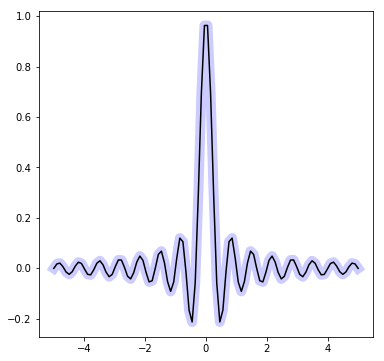

In [26]:
# plot y and ift of dft
fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)
ax.plot(x_arr, y_sinc, linewidth=10, color='b', alpha=0.2)
ax.plot(x_arr, np.real(y_sinc_i), linewidth=1.5, color='k')

We can see that our `idft(dft(y))` == `y` itself!

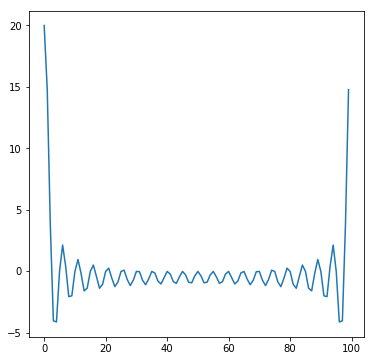

In [42]:
# plot dft
fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)
ax.plot(np.real(c_sqr))

In the case we are plotting the DFT of a localized square pulse, we see that the real component of the fourier coefficients resemble a sinc function! If you play around with the width of the square pulse, you will notice that the smaller you make the pulse, the wider the sinc wave gets, and vice versa. In other words, the more localized something is in the spatial domain, the broader it gets in the fourier domain.

Note that as we have written it, our DFT function needs to make $N^2$ computations every time we run it. Since computers can generally perform on the order of millions of computations per-second, we are limited to taking the DFT of signals with tens of thousands of elements if we want the program to finish in a reasonable amount of time.

### Interpretation

It is important to ask, what do the Fourier coefficients, $c_k$, in the DFT actually represent? If we inspect our DFT equation, what we see is that the coefficients are being multiplied by the complex exponentials, which are a compactified version of our sines and cosines. If we think back to our definition of the Fourier Series, we can see that the Fourier coefficients, $c_k$, are directly related to the $\alpha_k$ and $\beta_k$ coefficients of the sines and cosines. They represent, therefore, the amplitude of a sinusoid with a particular wavelength that is present in our data.

The value of $k$ on the otherhand, is related to the **frequency of the sinusoid** that is in the data. The frequency of a sinusoid can be written as

\begin{align}
\sin(\omega t) &= \sin\left(\frac{2\pi}{P}t\right)\\
\\
\sin(\eta x) &= \sin\left(\frac{2\pi}{\lambda} x\right)
\end{align}

where $\omega$ is the frequency and $P$ is the period if we are in the time domain, and $\eta$ is the frequency and $\lambda$ the wavelength if we are in the spatial domain. Recall now our complex exponential from before in the form of

\begin{align}
\exp\left(i\frac{2\pi kx}{L}\right).
\end{align}

If we were to rewrite the argument of the exponentials in the form we have above, then--ignoring the $i$--that means that

\begin{align}
k &= \frac{L}{\lambda}\\
k &= \frac{T}{P}
\end{align}

depending on whether we are in the time or spatial domain.

Let's see this in action.

In [146]:
# Make time data and y data sum of two sinusoids
t = np.linspace(-10,10,1001)

# total timespan is 20 seconds
T = 20.0

# sum three different sinusoids
# one has P = 3 sec, 1 sec and 0.5 sec
y = 4*np.sin(2 * np.pi * t / 4.0) + 2*np.sin(2 * np.pi * t / 1.0) + np.sin(2*np.pi*t / 0.5)

# take its dft
c = dft(y)

<IPython.core.display.Javascript object>


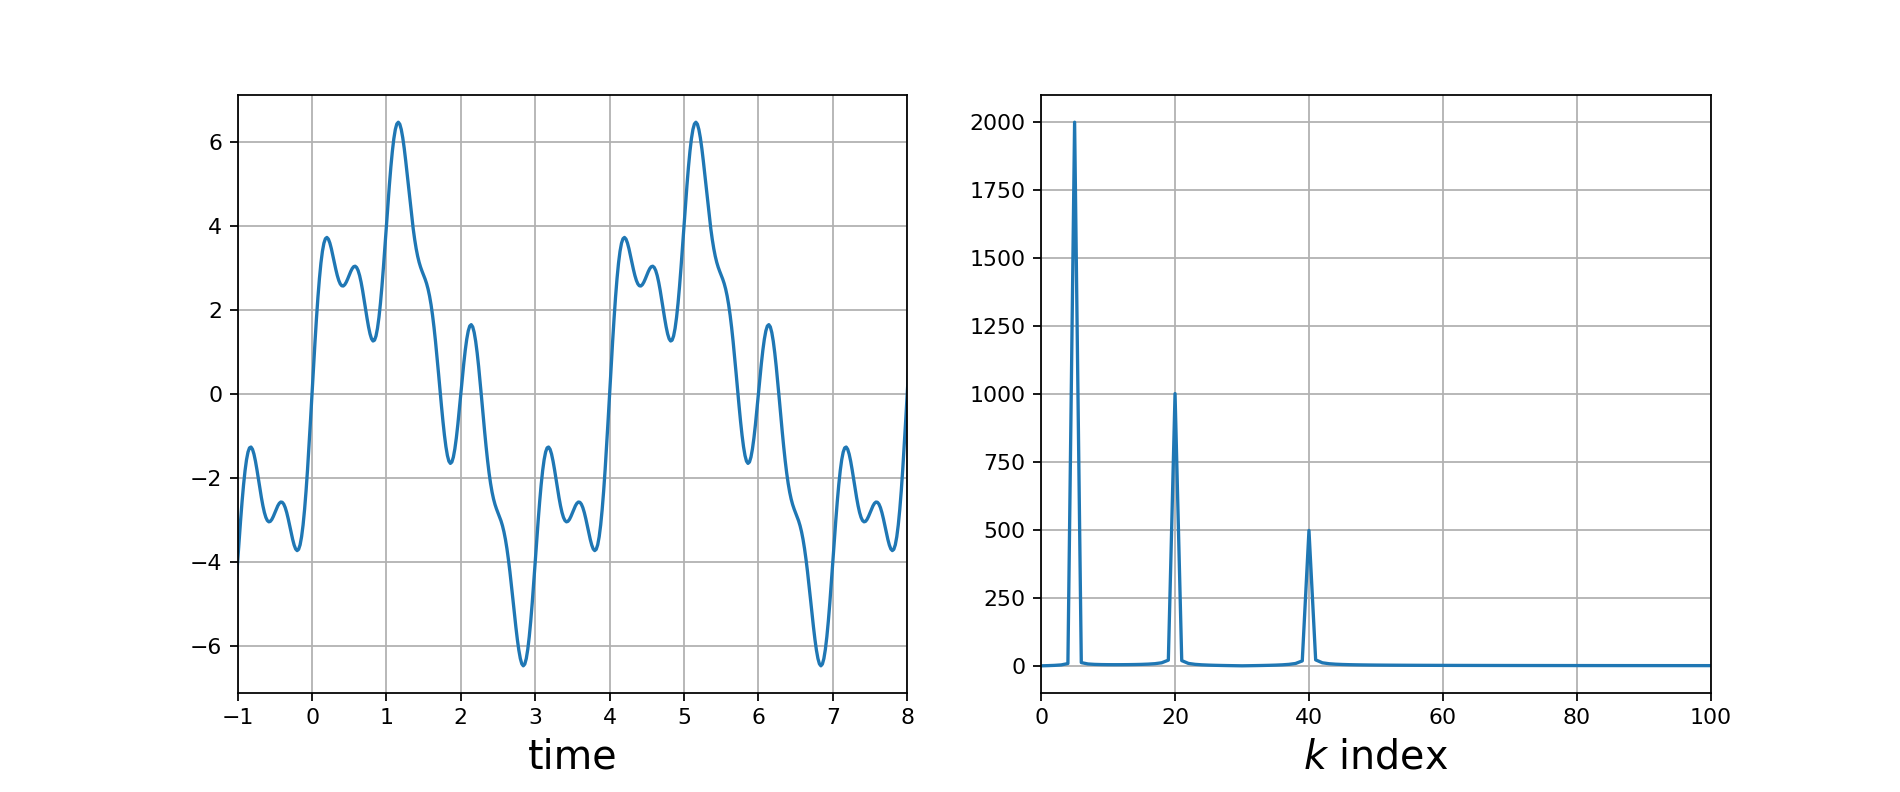

(0, 100)

In [166]:
# plot
%matplotlib notebook
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.grid(True)
ax2.grid(True)

ax1.plot(t, y)
ax1.set_xlabel('time',fontsize=18)
ax2.plot(np.abs(c))
ax2.set_xlabel('$k$ index', fontsize=18)
ax1.set_xlim(-1,8)
ax2.set_xlim(0,100)

In [169]:
%matplotlib inline

In [162]:
k1 = 5
k2 = 20
k3 = 40

print("Periods are {:.2f}, {:.2f}, {:.2f} seconds".format(T/k1, T/k2, T/k3))

Periods are 4.00, 1.00, 0.50 seconds


This confirms that the amplitude of the Fourier coefficients represents the strength of the sinusoid in the data, and the value of $k$ reflects the wavelength (or frequency) of that given sinusoid. [Here](https://www.quora.com/Intuitively-speaking-what-does-a-Fourier-transformation-represent) is a cool visual of a continuous and discrete FT breaking apart the amplitude and frequency of each sinusoid that goes into the FT.

Note that if we plot all of the Fourier coefficients, they seem to be symmetric about the front and back end. This has to do with the fact that our input data ($y_n$) is only real and has no imaginary component. It also has to do with a concept known as aliasing, which we won't go into in this lecture. Suffice it to say you can think of the last half of the coefficients as just the complex conjugate of the first half: they don't hold any new information.

### Breakout 3: Filtering and Detecting Periodicity

Let's use our DFT and IDFT functions to explore some data. You can find two data sets in the `data/` directory, one called `pitch.txt` and one called `sunspots.txt`. 

1.
Load in the data from `pitch.txt` and plot it. Then take its DFT and plot the absolute magnitude of the Fourier coefficients $|c_k|$, and see if you can interpret what it represents.

2.
What happens if you set some of the complex $c_k$ values to zero and then take its IDFT? Plot the real component of its inverse DFT.

3.
Load in the data from `sunspots.txt` and plot it. Can you see a periodic signal? Take its DFT and see if you can identify the period of the strongest sinusoid in the data.

Also, can you guess why the $k=0$ Fourier coefficient is so strong?

Let's return to the speed of the DFT. We said before that its an $N^2$ operation, where $N$ is the length of the array we feed the function (i.e., the number of time samples in our data). This means that arrays that are on the order of larger than a few tens of thousands elements are not practical to solve in a reasonable amount of time.

In [235]:
y = np.sin(2*np.pi*np.linspace(-4,4,2000))
%time c = dft(y)

CPU times: user 10.4 s, sys: 15.2 ms, total: 10.5 s
Wall time: 10.5 s


We can see that when we double the number of elements, the computation takes 4 times as long, making signals with hundreds of thousands of elements and greater simply impractical. There is another technique though, that can implement a discrete Fourier Transform that scales not as $N^2$, but as $N\cdot\log N$. This is aptly called the **Fast Fourier Transform**, which is the most common way to take a numerical FT. We aren't going to derive the FFT (it may be a good topic to explore for a final project!) here, but we will use pre-built functions for it in the `numpy.fft` module. Suffice it to say, its performance is way better than the DFT with its $N\cdot\log N$ scaling.

In [255]:
y = np.sin(2*np.pi*np.linspace(-4,4,10000))
%time c = np.fft.fft(y)

CPU times: user 930 µs, sys: 12 ms, total: 12.9 ms
Wall time: 12.7 ms


**Example**

Let's go back and use the `np.fft.fft` function to do some of the previous analyses we did using the `dft()` function. We can also use `np.fft.fftfreq` to get the frequency bins of the FFT.

### Breakout 3: Audio Files

What are sound waves? They are compression and rarefaction density waves in the air. The pitch of a sound is tied to the frequency of that wave as it travels through the air and vibrates our ear-drums. Let's use the `scipy` module to look at some audio files.

If you don't have the scipy module, use:
```
conda install scipy
```
or
```
python -m pip install scipy
```
in your command line.

In [217]:
import scipy.io.wavfile as wave
import os

In [220]:
def Audio(fname):
    """Provide a player widget for an audio file.
    -- Code adapted from UC Berkeley Astro 250: Python for Data Science --
    
    Parameters
    ==========
    fname : string
      Filename to be played.
    """
    from IPython.display import HTML, display
    
    # Find out file extension and deduce MIME type for audio format
    ext = os.path.splitext(fname)[1].replace('.', '').lower()
    mimetype = 'audio/' + ('mpeg' if ext == 'mp3' else ext)
    
    tpl = """<p>{fname}:</p>
<audio controls>
    <source src="files/{fname}" type="{mimetype}">

Your browser does not support the Audio element; you can play 
<a href="files/{fname}">this file</a> manually.
</audio>
"""
    display(HTML(tpl.format(**locals())))

In [219]:
Audio('data/voice.wav')

In [221]:
# Read the data
samp_rate, spectrum = wave.read('data/voice.wav')

1.
Inspect the following data, what do you see? Plot the data as a function of time.

2.
Take its Fourier Transform, and make the x-axis a function of frequency in Hz. [Hint: look at the `np.fft.fftfreq` function].

The soundfile we used above contains only 4 seconds of data and it had almost $10^5$ samples! You see how we very quickly find ourselves in need of algorithms like the FFT to do audio analyses.